In [1]:
# -*- coding: utf-8 -*-
# @author: tongzi
# @description: Working with unlabeled data - clustering analysis
# @created date: 2019/10/20
# @last modification: 2019/10/20

In [2]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 1. Grouping objects by similarity using k-means  
As we will see in a moment, the k-means algorithm is extremely easy to implement but is also computationally very efficient compared to other clustering algorithms, which might explain its popularity. The k-means algorithm belongs to the category of prototype-based clustering. We will discuss two other categories of clustering, hierarchical and density-based clustering, later in this chapter. Prototype-based
clustering means that each cluster is represented by a prototype, which can either be the centroid (average) of similar points with continuous features, or the medoid (the most representative or most frequently occurring point) in the case of categorical features. While k-means is very good at identifying clusters of spherical shape, one of the drawbacks of this clustering algorithm is that we have to specify the number of clusters k a priori. An inappropriate choice for k can result in poor clustering performance. Later in this chapter, we will discuss the **elbow** method and **silhouette** plots, which are useful techniques to evaluate the quality of a clustering to help us determine the optimal number of clusters k.

In [3]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=150, n_features=3, centers=3, 
                  cluster_std=0.5, shuffle=True, random_state=0)

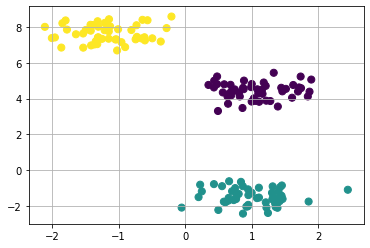

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, marker='o')
plt.grid(True)

our goal is to group the samples based on their feature similarities, which we can be achieved using the k-means algorithm that can be summarized by the following four steps:  
&emsp;&emsp;(1) Randomly pick $k$ centroids from the sample points as the initial cluster centers;  
&emsp;&emsp;(2) Assign each sample to the nearest centroid $\mu^{(j)}, j \in {1,...,k}$;  
&emsp;&emsp;(3) Move the centroid to the center of the samples that were assigned to it;  
&emsp;&emsp;(4) Repeat the step 2 and 3 until the centroids do not change or the user-defined tolerance or a maximum number of iterations is readched.

Now the next question is how do we measure similarity between objects? We can define similarity as the opposite of distance, and a commonly used distance for clustering samples with continuous features is the **squared Euclidean distance** between two points x and y in m-dimensional space:  
$$ d(x, y)^2 = \sum_{j=1}^m \left( x_j - y_j \right)^2 = \parallel x - y \parallel^2_2 $$

Note that, in the preceding equation, the index $j$ refers to the jth dimension (feature column) of the sample points $x$ and $y$. In the rest of this section, we will use the superscripts $i$ and $j$ to refer to the sample index and cluster index, respectively.  
  
Based on this Euclidean distance metric, we can describe the k-means algorithm as a simple optimization problem, an iterative approach for minimizing the **within-cluster sum of squared errors (SSE)**, which is sometimes also called **cluster inertia**:  
$$ SSE = \sum_{i=1}^n \sum_{j=1}^m \omega^{(i,j)} \parallel x^{(i)} - \mu^{(j)} \parallel_2^2 $$

Here, $\mu^{j}$ is the representative point (centroid) for cluster $j$, and $\omega^{(i,j)} = 1 $ for the sample $x^{(i)}$ is in cluster $j$; $\omega^{(i,j)}=0$ otherwise.

In [7]:
from sklearn.cluster import KMeans
kmean = KMeans(n_clusters=3, init='random', n_init=10, max_iter=300,
             tol=12-4, random_state=0)

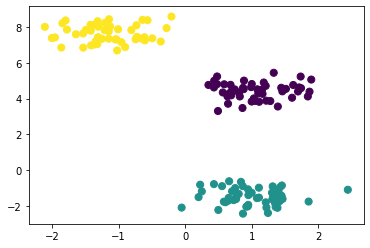

In [12]:
y_km = kmean.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_km, s=50)

### 2. KMeans++  
So far, we discussed the classic k-means algorithm that uses a random seed to place the initial centroids, which can sometimes result in bad clusterings or slow convergence if the initial centroids are chosen poorly. One way to address this issue is to run the k-means algorithm multiple times on a dataset and choose the best performing model in terms of the SSE. Another strategy is to place the initial centroids far away from each other via the k-means++ algorithm, which leads to better and more consistent results than the classic k-means.  
  
The initialization in k-means++ are summarized as follows:  
&emsp;&emsp;(1) Initialize an empty set $M$ to store centroids being selected;  
&emsp;&emsp;(2) Randomly choose the first centroid $\mu^{(j)}$ from the input samples and assign it to $M$;  
&emsp;&emsp;(3) for each sample $x^{(i)}$ that is not in $M$, find the minimum squared distance $d(x^{(i)}, M)^2$ to any of centroids in $M$;&emsp;&emsp;(3) To randomly select the next cnetroid $\mu^{(p)}$, use a weighted propability distribution equal to $\frac{d(\mu^{(p)}, M)^2}{\sum_i d(x^{(i)}, M)^2}$;  
&emsp;&emsp;(4) Repeat steps (2) and (3) until k centriods are selected;  
&emsp;&emsp;(5) Proceed with classic k-means algorithm


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Unrecognized location 'left bottom'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  # This is added back by InteractiveShellApp.init_path()


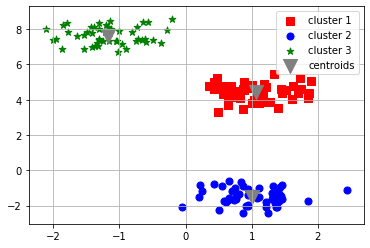

In [15]:
plt.scatter(X[y_km == 0, 0], X[y_km == 0, 1], s=50, c='red', 
            marker='s', label='cluster 1')
plt.scatter(X[y_km == 1, 0], X[y_km == 1, 1], s=50, c='blue', 
            marker='o', label='cluster 2')
plt.scatter(X[y_km == 2, 0], X[y_km == 2, 1], s=50, c='green', 
            marker='*', label='cluster 3')

# visualize the centers
plt.scatter(kmean.cluster_centers_[:, 0], kmean.cluster_centers_[:, 1], 
           s=200, marker='v', c='gray', label='centroids')
plt.legend(loc='left bottom')
plt.grid(True)

Although k-means worked well on this toy dataset, we need to note some of the main challenges of k-means. One of the drawbacks of k-means is that we have to specify the number of clusters k a priori, which may not always be so obvious in real-world applications, especially if we are working with a higher dimensional dataset that cannot be  isualized. The other properties of k-means are that clusters do not overlap and are not hierarchical, and we also assume that there is at least one item in each cluster.

### 3. Hard versus soft clustering  
**Hard clustering** describes a family of algorithms where each sample in a dataset is assigned to exactly one cluster, as in the k-means algorithm that we discussed in the previous subsection. In contrast, algorithms for **soft clustering** (sometimes also called **fuzzy clustering**) assign a sample to one or more clusters. A popular example of soft clustering is the **fuzzy C-means (FCM)** algorithm (also called **soft k-means** or **fuzzy k-means**).

### 4.Using elbow methods to find the optimal number of clusters  
One of the main challenges in unsupervised learning is that we do not know the definitive answer. We don't have the ground truth class labels in our dataset that allow us to apply the techniques that we used in Chapter 6, Learning Best Practices for Model Evaluation and hyperparameter Tuning, in order to evaluate the performance of
a supervised model. Thus, in order to quantify the quality of clustering, we need to use intrinsic metrics—such as the within-cluster SSE (distortion) that we discussed earlier in this chapter—to compare the performance of different k-means clusterings. Conveniently, we don't need to compute the within-cluster SSE explicitly as it is
already accessible via the inertia_ attribute after fitting a KMeans model:

In [16]:
print(f'Distortion: {kmean.inertia_:.2f}')

Distortion: 100.89


Text(0, 0.5, 'Distortion')

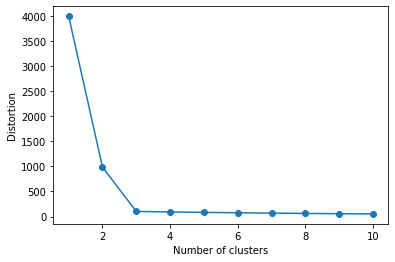

In [17]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i)
    km.fit(X)
    distortions.append(km.inertia_)
    
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')


As we can see in the following plot, the elbow is located at $k = 3$, which provides evidence that $k = 3$ is indeed a good choice for this dataset.